<img src="im_note/AC-logo.png" alt="Drawing" style="width: 200px;"/> <img src="im_note/logo.png" alt="Drawing" style="width: 150px;"/> 
<img src="im_note/logo3.png" alt="Drawing" style="width: 350px;"/><img src="im_note/GCRF.png" alt="Drawing" style="width: 150px;"/>

# Using gaussian processes to forecast VCI for two regions

#### -GPs for time series: http://www.robots.ox.ac.uk/~sjrob/Pubs/philTransA_2012.pdf
#### -We use Pyro for our GP fit: http://pyro.ai/examples/gp.html

In [1]:
import GPplot # the functions we use in this notebook


<img src="im_note/livelihood_zones1.png" alt="Drawing" style="width: 650px;"/> 

<b>We used Landsat to derive weekly NDVI ($\rm{NDVI} = \frac{NIR- red}{NIR+red}$) values <b>
<b>for a 1000 randomly selected pixels for all the Pastoral Livelihood-zone county cross sections in Kenya. From the NDVI we <b>
<b>dirive the weekly VCI ($\rm{VCI}_i = 100 \times \frac{\rm{NDVI}_i - \rm{NDVI}_{min,i}}{ \rm{NDVI}_{max,i} - \rm{NDVI}_{min,i}}$). <b>

<b>This example is for the county livelihood zone intersection.</b>


### Picking a region to load

In [2]:
import pandas as pd
import numpy as np
from astropy.table import Table
x = pd.read_csv('im_note/Index.csv')
x = np.array(x).T
a = x[0].tolist()
b = x[1].tolist()
t = Table([a[:33], b[:33]], names=("Region",'Index Number'))
t.show_in_notebook()

idx,Region,Index Number
0,Baringo_Z24,0
1,Baringo_Z24_RBFP_a,1
2,Baringo_Z24_RBFP_an_tri,2
3,Elgeyo_Marakwet_Z24,3
4,Garsa_Z10,4
5,Isiolo_Z10,5
6,Isiolo_Z10_RBFP_an,6
7,Isiolo_Z10_RBFP_an_trip,7
8,Isiolo_Z24,8
9,Isiolo_Z5,9


In [3]:
print('Please select 2 for Baringo_z24 or 7 for Isiolo z_10')
region= GPplot.which_region()#Calls the which region function. (Allows choice of region)
print(region)


Please select 2 for Baringo_z24 or 7 for Isiolo z_10


Please select a region index number:  7


7


### The region's time and VCI is then loaded into two variables and plotted

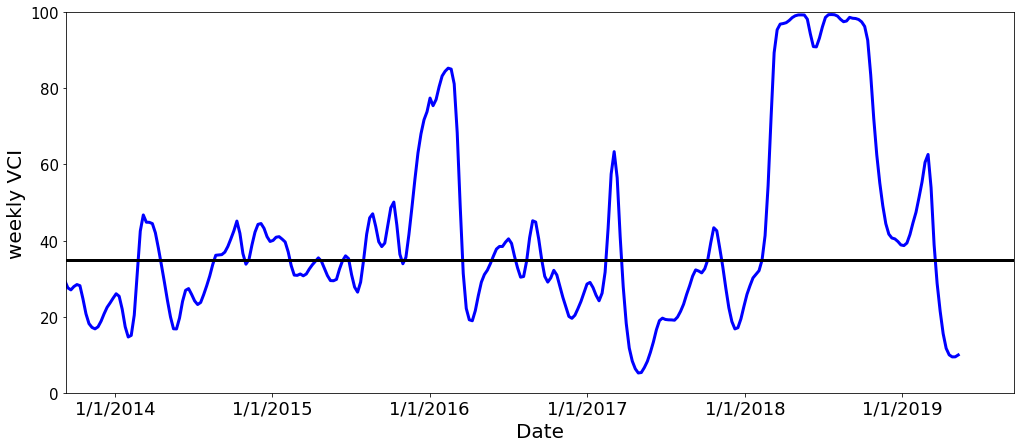

In [4]:
X,y = GPplot.load(region)            # X = days since 1/1/2000 (Taken from numpy array file)
GPplot.plot_vci(X,y)                 # y = VCI as measured by Landsat


###  The GP is trained 

In [5]:
# training the GP, using an RBF kernel on X and y
# mean contains the GP prediction at week Xtest_use
mean, Xtest_use = GPplot.run_GP(X,y)

#### Testing our code, dotted line is 2 week forecast. See Barrett, Duivenvoorden and Salkapi et al. in prep
<img src="im_note/NDVI.png" alt="Drawing" style="width: 1150px;"/> 

### The next plot will show the VCI predictions in red. We use the GP to estimate the VCI at every week (X) where we have a VCI observation (y). We also use the GP to predict the VCI 1 to 8 weeks ahead. 

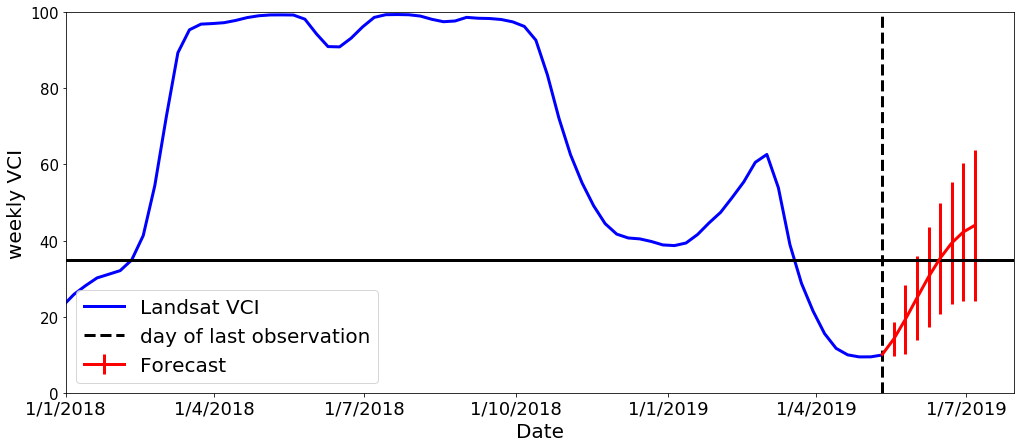

weeks =  1 ,   VCI =  14
weeks =  2 ,   VCI =  19
weeks =  3 ,   VCI =  25
weeks =  4 ,   VCI =  30
weeks =  5 ,   VCI =  35
weeks =  6 ,   VCI =  39
weeks =  7 ,   VCI =  42
weeks =  8 ,   VCI =  44


In [6]:
GPplot.plot_vci_fc(Xtest_use,mean,X,y)

### A 3 month average VCI is currently being used as a drought indicator by NDMA, we convert our weekly VCI to VCI3M by taking the average VCI over the last 3 month period.

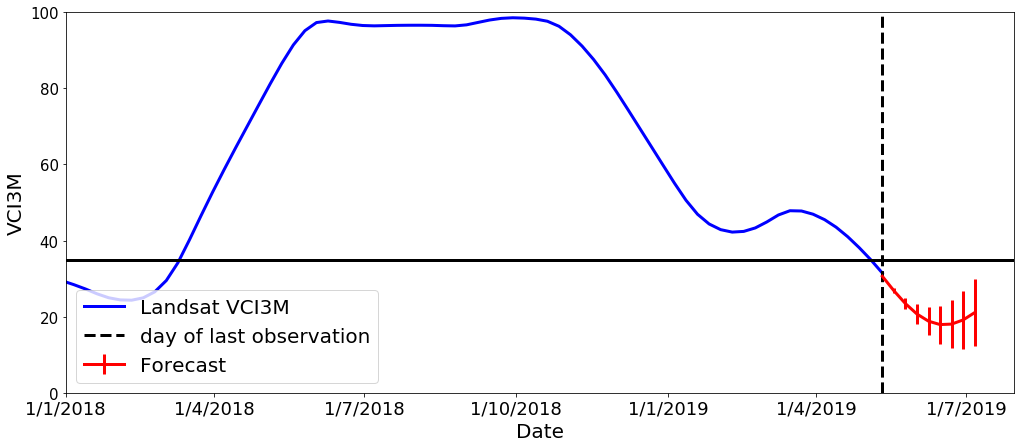

weeks  =  1 ,   VCI3M =  27
weeks  =  2 ,   VCI3M =  23
weeks  =  3 ,   VCI3M =  21
weeks  =  4 ,   VCI3M =  19
weeks  =  5 ,   VCI3M =  18
weeks  =  6 ,   VCI3M =  18
weeks  =  7 ,   VCI3M =  19
weeks  =  8 ,   VCI3M =  21


In [7]:
GPplot.plot_vci_fc3M(Xtest_use,mean,X,y)

### To demonstrate forecasting for another region, we now show a plot of 3 month VCI for another region:

In [8]:
region = GPplot.which_region()

Please select a region index number:  2


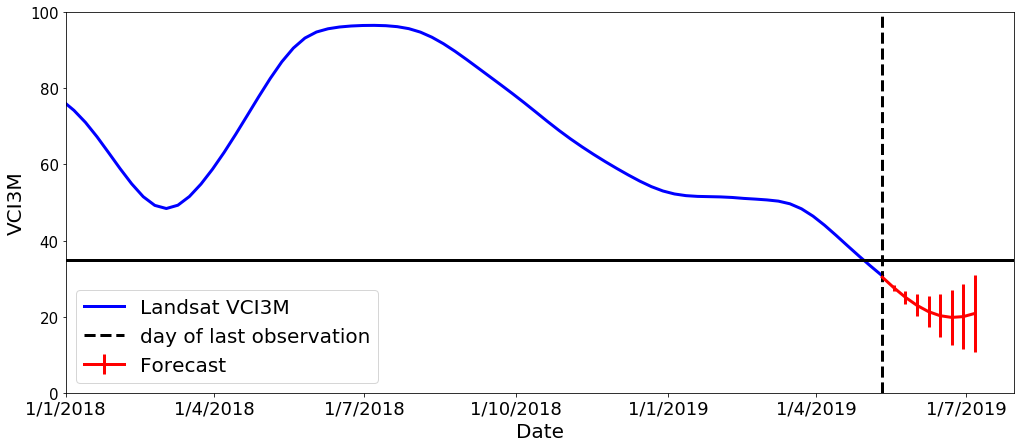

weeks  =  1 ,   VCI3M =  28
weeks  =  2 ,   VCI3M =  25
weeks  =  3 ,   VCI3M =  23
weeks  =  4 ,   VCI3M =  21
weeks  =  5 ,   VCI3M =  20
weeks  =  6 ,   VCI3M =  20
weeks  =  7 ,   VCI3M =  20
weeks  =  8 ,   VCI3M =  21


In [9]:
X,y = GPplot.load(region)
mean, Xtest_use = GPplot.run_GP(X,y)
GPplot.plot_vci_fc3M(Xtest_use,mean,X,y)